In [3]:
# core python 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import ipywidgets
import os
import geological_segmentation as geoseg

# tools in the simPEG Ecosystem 
import discretize  # for creating computational meshes

# linear solvers
from pymatsolver import Pardiso as Solver  # this is a fast linear solver 

# SimPEG inversion machinery
from SimPEG import (
    Data, maps,
    data_misfit, regularization, optimization, inverse_problem, 
    inversion, directives
) 

# DC resistivity and IP modules
from SimPEG.electromagnetics import resistivity as dc
from SimPEG.electromagnetics import induced_polarization as ip

from SimPEG.electromagnetics.static.utils.static_utils import (
    apparent_resistivity_from_voltage,
    plot_pseudosection,
)

# set the font size in the plots
from matplotlib import rcParams
rcParams["font.size"] = 14


# load mesh
mesh = discretize.TensorMesh.read_UBC("/home/juanito/Documents/projects/mcD/dflt/dcinv2d.msh")
actind = np.ones(mesh.n_cells, dtype=bool)

mcd_model =  np.exp(np.load(r"/home/juanito/git/jresearch/geological_segmentation/mcd_iterations/model_12.npy"))

segmentor = geoseg.SamClassificationModel(
    mesh,
    segmentation_model_checkpoint=r"/home/juanito/Documents/trained_models/sam_vit_h_4b8939.pth"
)
segmentor.segment_model.cuda()
masks_iter_2 = segmentor.fit(np.log(mcd_model))


mask 0 vote total: 1
mask 1 vote total: 1
mask 2 vote total: 0
mask 3 vote total: 0
mask 4 vote total: 0
mask 5 vote total: 0
[1]
[[1.00000000e+00 4.44444444e-01 0.00000000e+00 6.41025641e-03
  6.41025641e-03 6.41025641e-03]
 [4.44444444e-01 0.00000000e+00 9.06618314e-04 2.84900285e-03
  2.84900285e-03 2.84900285e-03]
 [0.00000000e+00 9.06618314e-09 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.41025641e-13 2.84900285e-13 0.00000000e+00 1.00000000e-05
  1.00000000e+00 1.00000000e+00]
 [6.41025641e-13 2.84900285e-13 0.00000000e+00 1.00000000e-05
  1.00000000e+00 1.00000000e+00]
 [6.41025641e-13 2.84900285e-13 0.00000000e+00 1.00000000e-05
  1.00000000e+00 1.00000000e+00]]


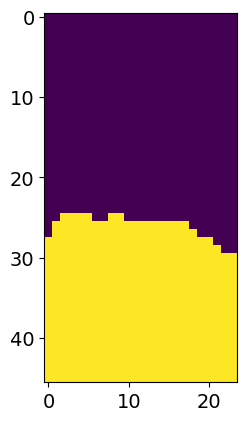

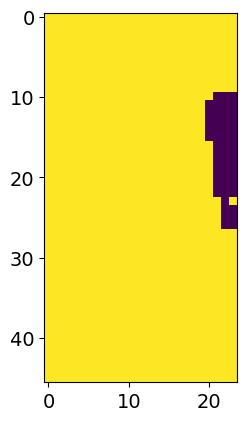

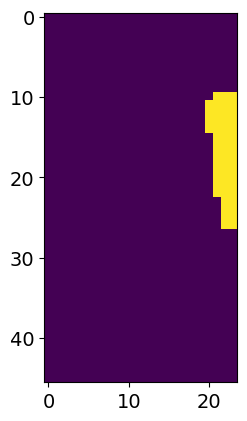

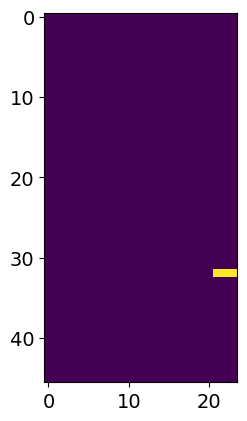

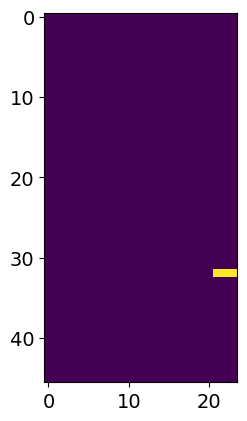

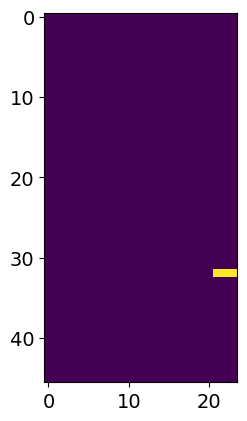

In [4]:
for mask in masks_iter_2:
    plt.imshow(mask['segmentation'])
    plt.show()

(<matplotlib.collections.QuadMesh at 0x788f08125c90>,)

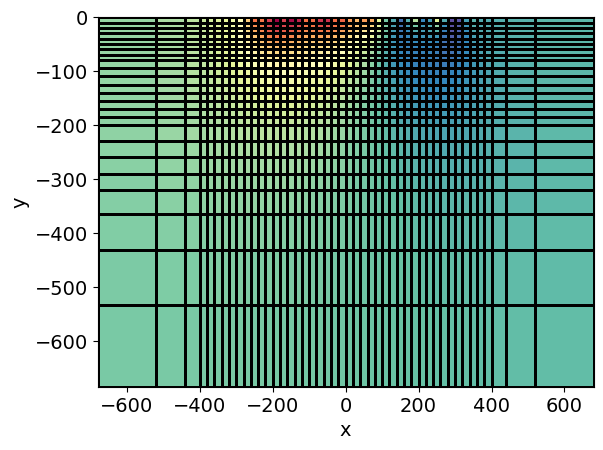

In [6]:
mesh.plot_image(mcd_model, grid=True, pcolor_opts={"cmap": "Spectral_r"})

In [8]:
len(masks_iter_2)

3